In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [14]:
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml

In [27]:
from sklearn.linear_model import LogisticRegression

In [64]:
from sklearn.model_selection import cross_val_score

In [68]:
from sklearn import svm

In [10]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

## load data

In [3]:
mnist = fetch_openml('mnist_784')

## explore data

In [5]:
type(mnist)

sklearn.utils.Bunch

In [8]:
mnist.data.shape
mnist.keys()

(70000, 784)

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [9]:
mnist.categories
print(mnist.feature_names)
print(mnist.target_names)
print(mnist.DESCR)

{}

['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91', 'pixel9

In [11]:
X = mnist['data']
y = mnist['target']

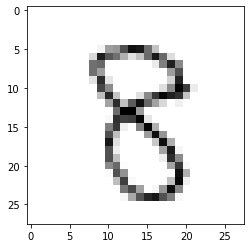

In [12]:
random_digit = X[3600]
some_random_digit = random_digit.reshape(28,28)
plt.imshow(some_random_digit, cmap=matplotlib.cm.binary, interpolation='nearest')

In [36]:
y[3600]

'8'

## make train, test sets

In [53]:
x_train, x_test = X[:6000], X[6000:7000]
y_train, y_test = y[:6000], y[6000:7000]

In [54]:
shuffle_index = np.random.permutation(6000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

#### select subset where digit is 2

In [55]:
y_train[3600]

'0'

In [56]:
y_train_2 = (y_train == '2')
y_test_2  = (y_test  == '2')

y_train_2[0:10]
y_test_2[0:10]

array([False, False, False, False, False, False, False, False, False,
       False])

array([False, False, False, False, False,  True, False, False, False,
       False])

In [57]:
y_train_2.sum()
y_test_2.sum()

581

94

## `LogisticRegression`

#### fit

In [30]:
LogisticRegression?

In [58]:
clf = LogisticRegression(tol=0.5, max_iter=1000)
#clf = LogisticRegression(tol=0.1)
clf

LogisticRegression(max_iter=1000, tol=0.5)

In [59]:
clf.fit(x_train, y_train_2)

LogisticRegression(max_iter=1000, tol=0.5)

#### make predictions

array([False])

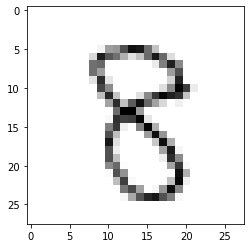

In [61]:
random_digit = X[3600]
some_random_digit = random_digit.reshape(28,28)
plt.imshow(some_random_digit, cmap=matplotlib.cm.binary, interpolation='nearest')

clf.predict([random_digit])

array([ True])

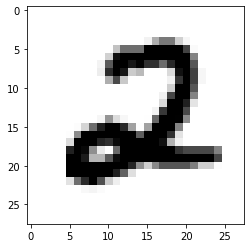

In [62]:
random_digit = X[4599]
some_random_digit = random_digit.reshape(28,28)
plt.imshow(some_random_digit, cmap=matplotlib.cm.binary, interpolation='nearest')

clf.predict([random_digit])

#### cross validation

In [65]:
cv_score = cross_val_score(clf, x_train, y_train_2, cv=3, scoring='accuracy')

In [67]:
cv_score
cv_score.mean()

array([0.958, 0.954, 0.959])

0.957

## `SupportVectorMachine`

#### fit

In [69]:
clf_2 = svm.SVC()
clf_2

SVC()

In [70]:
clf_2.fit(x_train, y_train_2)

SVC()

#### make predictions

array([False])

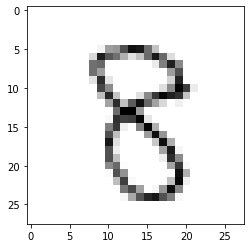

In [71]:
random_digit = X[3600]
some_random_digit = random_digit.reshape(28,28)
plt.imshow(some_random_digit, cmap=matplotlib.cm.binary, interpolation='nearest')

clf_2.predict([random_digit])

array([ True])

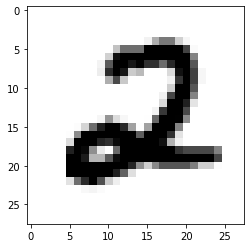

In [72]:
random_digit = X[4599]
some_random_digit = random_digit.reshape(28,28)
plt.imshow(some_random_digit, cmap=matplotlib.cm.binary, interpolation='nearest')

clf_2.predict([random_digit])

#### cross validation

In [73]:
cv_score_2 = cross_val_score(clf_2, x_train, y_train_2, cv=3, scoring='accuracy')

In [74]:
cv_score_2
cv_score_2.mean()

array([0.982 , 0.9865, 0.9835])

0.984